In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("adult.csv")
df.head()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns.tolist()

['index',
 'age',
 ' workclass',
 ' fnlwgt',
 ' education',
 ' education-num',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week',
 ' native-country',
 'income']

In [5]:
df.shape

(32561, 16)

In [6]:
df.drop(['index',' fnlwgt',' education'],axis=1,inplace=True)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
listNonNumVal=[' workclass', ' marital-status', ' occupation', ' relationship',' race', ' sex', ' native-country','income']
for col in listNonNumVal:
    listUnique=df[col].unique()
    df[col].replace(listUnique,[x for x in range(listUnique.size)],inplace=True)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,13,1,1,1,0,0,0,0,13,0,0
2,38,2,9,2,2,0,0,0,0,0,40,0,0
3,53,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,13,1,3,2,1,1,0,0,40,1,0


In [8]:
norm_df=(df-df.mean())/df.std()
norm_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030670,-1.884571,1.134721,-0.866068,-1.378100,-1.073024,-0.353403,-0.703061,0.148451,-0.216656,-0.035429,-0.255743,-0.56319
1,0.837096,-1.068730,1.134721,-0.066951,-1.082777,-0.377338,-0.353403,-0.703061,-0.145918,-0.216656,-2.222119,-0.255743,-0.56319
2,-0.042641,-0.252888,-0.420053,0.732166,-0.787453,-1.073024,-0.353403,-0.703061,-0.145918,-0.216656,-0.035429,-0.255743,-0.56319
3,1.057031,-0.252888,-1.197440,-0.066951,-0.787453,-0.377338,1.240608,-0.703061,-0.145918,-0.216656,-0.035429,-0.255743,-0.56319
4,-0.775756,-0.252888,1.134721,-0.066951,-0.492130,0.318348,1.240608,1.422309,-0.145918,-0.216656,-0.035429,-0.057541,-0.56319


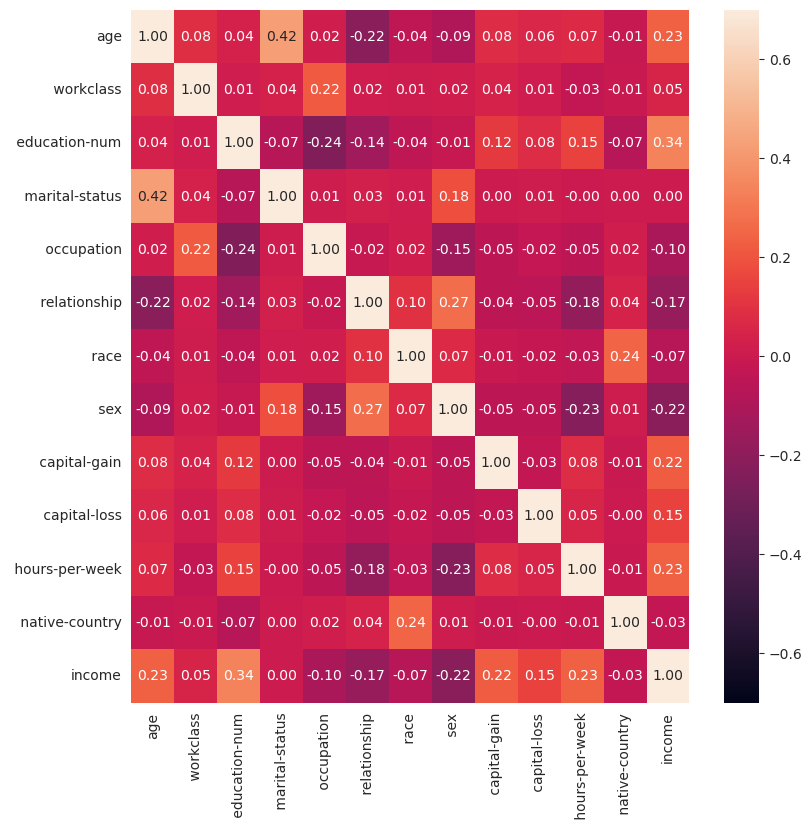

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
sns.heatmap(norm_df.corr(),annot=True, fmt=".2f",vmin=-0.7, vmax=0.7)
plt.show()

In [10]:
target = pd.DataFrame(df['income'])
norm_df.drop(['income'],axis=1,inplace=True)
df.drop(['income'],axis=1,inplace=True)

We will keep all features that have more than 15% correlation with 'income'. Either: age, education-num, relationship, sex, capital-gain, capital-loss, hours-per-week

In [11]:
remaining_df=norm_df.drop([' workclass', ' occupation', ' race',' native-country',' marital-status'],axis=1)
remaining_df.head()

,age,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week
0,0.030670,1.134721,-1.073024,-0.703061,0.148451,-0.216656,-0.035429
1,0.837096,1.134721,-0.377338,-0.703061,-0.145918,-0.216656,-2.222119
2,-0.042641,-0.420053,-1.073024,-0.703061,-0.145918,-0.216656,-0.035429
3,1.057031,-1.197440,-0.377338,-0.703061,-0.145918,-0.216656,-0.035429
4,-0.775756,1.134721,0.318348,1.422309,-0.145918,-0.216656,-0.035429


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train,X_test,y_train,y_test= train_test_split(remaining_df,target,train_size=0.7, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
mse=mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error Filter methods: {mse}")

Mean Squared Error Filter methods: 0.1773978912887706


/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [14]:
sfs = SFS(LogisticRegression(),k_features=9,forward=True,scoring='neg_mean_squared_error',cv=5)
sfs = sfs.fit(np.array(norm_df), target)
sfs.k_feature_idx_

/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn

(0, 1, 2, 3, 4, 7, 8, 9, 11)

In [15]:
sbs = SFS(LogisticRegression(), k_features=9,forward=False,scoring='neg_mean_squared_error',cv=5)
sbs = sbs.fit(np.array(norm_df), target)
sbs.k_feature_idx_

/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn

(0, 1, 2, 4, 6, 7, 8, 9, 10)

In [16]:
X_sfs,X_test_sfs,y_sfs,y_test_sfs= train_test_split(norm_df[norm_df.columns[list(sfs.k_feature_idx_)]],target,train_size=0.7, random_state=0)
model_sfs = LogisticRegression()
model_sfs.fit(X_sfs,y_sfs)
mse_sfs=mean_squared_error(y_test_sfs, model_sfs.predict(X_test_sfs))
print(f"Mean Squared Error SFS: {mse_sfs}")

/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error SFS: 0.17586242194697513


In [17]:
X_sbs,X_test_sbs,y_sbs,y_test_sbs= train_test_split(norm_df[norm_df.columns[list(sbs.k_feature_idx_)]],target,train_size=0.7, random_state=0)
model_sbs = LogisticRegression()
model_sbs.fit(X_sbs,y_sbs)
mse_sbs=mean_squared_error(y_test_sbs, model_sbs.predict(X_test_sbs))
print(f"Mean Squared Error SBS: {mse_sbs}")

Mean Squared Error SBS: 0.17412222335960692


/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=12)
df_pca = pca.fit_transform(norm_df)
exp_var_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {exp_var_ratio}")

Explained variance ratio: [0.14156769 0.12196151 0.11270163 0.10060439 0.0890454  0.08478192
 0.07176881 0.06911962 0.06251523 0.05394781 0.05275462 0.03923138]


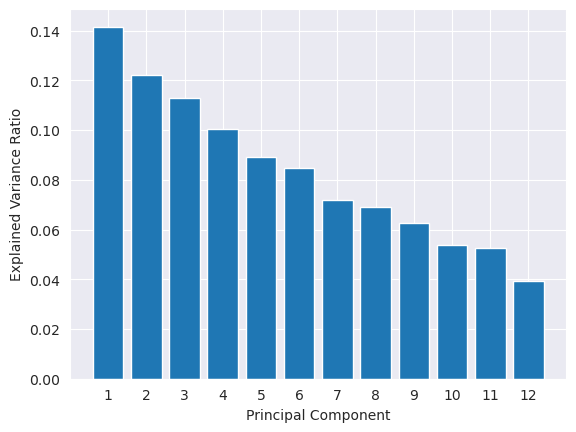

In [20]:
plt.bar(np.arange(1, 13), exp_var_ratio)
plt.xticks(np.arange(1, 13))
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [21]:

X_pca, X_test_pca, y_pca, y_test_pca = train_test_split( df_pca[:,:9], target, train_size=0.7, random_state=0)
model_pca = LogisticRegression()
model_pca.fit(X_pca,y_pca)
mse_pca = mean_squared_error(y_test_pca, model_pca.predict(X_test_pca))
print(f"Mean Squared Error PCA: {mse_pca}")

Mean Squared Error PCA: 0.17606715119254784


/home/thomasglgr/anaconda3/envs/Assignment1_CCE3503/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print(f"Mean Squared Error Filter methods: {mse}")
print(f"Mean Squared Error SFS: {mse_sfs}")
print(f"Mean Squared Error SBS: {mse_sbs}")
print(f"Mean Squared Error PCA: {mse_pca}")

Mean Squared Error Filter methods: 0.1773978912887706
Mean Squared Error SFS: 0.17586242194697513
Mean Squared Error SBS: 0.17412222335960692
Mean Squared Error PCA: 0.17606715119254784
